In [8]:
%matplotlib inline
import re
import os
import xarray as xr
import pandas as pd
import numpy as np

from snodas_xarray import dateFromFile, dataArrayFromFile
from datetime import datetime, timedelta

In [13]:
# Get list of valid data files
pattern = re.compile("^SNODAS_\d{8}.tif{1,2}$")
files = sorted([os.path.join("tiff",f) for f in os.listdir("tiff") if pattern.match(f)])

# Extract dates and data arrays from data files
dates = [dateFromFile(f) for f in files]
arrs = [dataArrayFromFile(f) for f in files]

Get range of dates as list

In [10]:
# Concatenate data arrays and add time coordinates
ds = xr.concat(arrs, 'time') \
    .squeeze('band', drop=True)
ds.coords['time'] = dates

# Reformat no-values
ds = ds.where(ds != -9999)

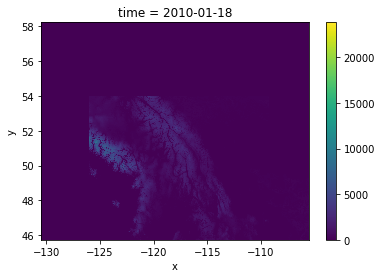

In [11]:
ds.isel(time = 2, x=slice(0,3000), y=slice(0,1500)).plot()

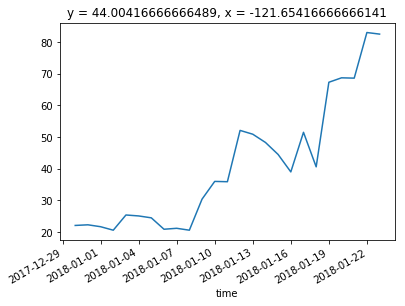

In [12]:
(ds.sel(x=-121.6555676, y=44.0018751, method='nearest')/10).plot()

In [14]:
print(ds.sel(time = 0, x=-121.6555676, y=44.0018751, method='nearest').item())

221.0


In [68]:
# def frange(x, y, jump):
#   while x < y:
#     yield x
#     x += jump
    
# def entry(x,y):
#     return {
#         'coordinates': [x,y],
#         'snow_depth': ds.sel(time = 0, x=x, y=y, method='nearest').item()/10
#     }

# vals = [entry(x,y) for x in frange(-130,-63,0.1) for y in frange(25,58,0.1) ]
# vals = [val for val in vals if not np.isnan(val['snow_depth']) and val['snow_depth'] != 0]
# pd.DataFrame(vals).to_json('test.csv', orient='records')
        